# 1. LASSO for Feature Selection

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "emotions.csv"
df = pd.read_csv(file_path)

# Separate features and target
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Target column (emotions)

from sklearn.preprocessing import LabelEncoder

# Encode the target labels (NEGATIVE -> 0, NEUTRAL -> 1, POSITIVE -> 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LASSO for feature selection
lasso = Lasso(alpha=0.02)  # You can tune alpha for different levels of feature selection
lasso.fit(X_scaled, y)

# Select nonzero coefficient features
selected_features = X.columns[lasso.coef_ != 0]
X_selected = X[selected_features]

print(f"Selected {len(selected_features)} features using LASSO.")


Selected 90 features using LASSO.


In [2]:
selected_features

Index(['mean_4_a', 'mean_d_9_a', 'stddev_2_a', 'max_q_1_a', 'max_q_3_a',
       'max_q_4_a', 'max_q_11_a', 'max_q_13_a', 'max_q_22_a', 'min_0_a',
       'min_q_1_a', 'min_q_3_a', 'min_q_5_a', 'min_q_6_a', 'min_q_13_a',
       'min_q_18_a', 'covmat_0_a', 'covmat_9_a', 'covmat_79_a', 'covmat_90_a',
       'covmat_108_a', 'eigen_2_a', 'eigen_5_a', 'eigen_6_a', 'logm_2_a',
       'logm_3_a', 'logm_7_a', 'logm_8_a', 'logm_9_a', 'logm_15_a',
       'logm_33_a', 'logm_37_a', 'logm_42_a', 'logm_43_a', 'logm_45_a',
       'logm_53_a', 'logm_62_a', 'logm_64_a', 'logm_66_a', 'entropy0_a',
       'entropy2_a', 'entropy3_a', 'fft_6_a', 'fft_9_a', 'fft_30_a',
       'fft_206_a', 'fft_209_a', 'mean_0_b', 'mean_4_b', 'max_q_3_b',
       'max_q_11_b', 'max_q_13_b', 'max_q_18_b', 'max_q_22_b', 'min_0_b',
       'min_4_b', 'min_q_5_b', 'min_q_6_b', 'min_q_11_b', 'min_q_15_b',
       'min_q_16_b', 'min_q_18_b', 'min_q_19_b', 'covmat_31_b', 'covmat_86_b',
       'eigen_2_b', 'eigen_6_b', 'logm_2_b', 'logm_

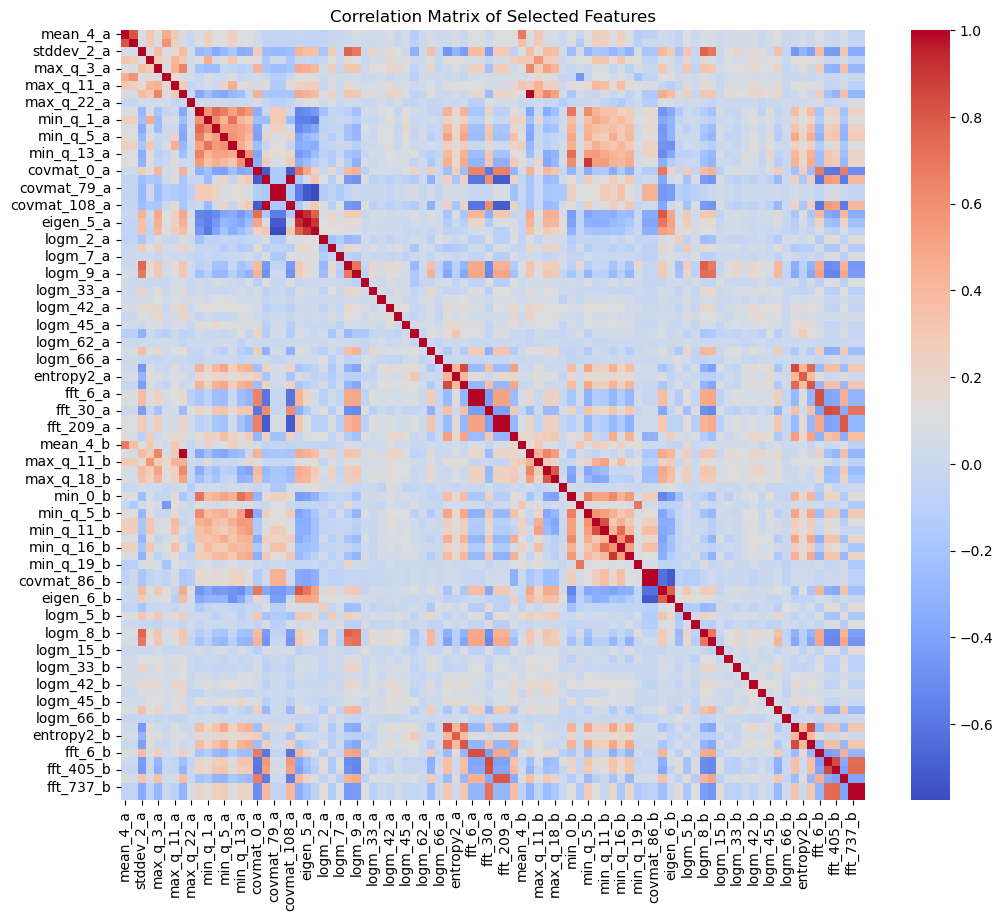

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_selected.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Selected Features")
plt.show()


## Train-Test Split and Model Training (KNN with 5-Fold Cross-Validation)

In [5]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define KNN hyperparameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Best parameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print(f"Training Time: {end_time - start_time:.2f} seconds")


Best Hyperparameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.8950146627565981
Training Time: 6.66 seconds


In [8]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_accuracy = cross_val_score(best_knn, X_selected, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(best_knn, X_selected, y, cv=5, scoring='precision_weighted')
cv_recall = cross_val_score(best_knn, X_selected, y, cv=5, scoring='recall_weighted')
cv_f1 = cross_val_score(best_knn, X_selected, y, cv=5, scoring='f1_weighted')

# Print results
print("Cross-validation scores:")
print(f"Fold-1: {cv_accuracy[0]:.4f}, Fold-2: {cv_accuracy[1]:.4f}, Fold-3: {cv_accuracy[2]:.4f}, Fold-4: {cv_accuracy[3]:.4f}, Fold-5: {cv_accuracy[4]:.4f}")
print(f"Average Accuracy: {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall: {cv_recall.mean():.4f}")
print(f"Average F1 Score: {cv_f1.mean():.4f}")


Cross-validation scores:
Fold-1: 0.9087, Fold-2: 0.9040, Fold-3: 0.8920, Fold-4: 0.8920, Fold-5: 0.9038
Average Accuracy: 0.9001
Average Precision: 0.9001
Average Recall: 0.9001
Average F1 Score: 0.8994


In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define KNN hyperparameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Best parameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print(f"Training Time: {end_time - start_time:.2f} seconds")


Best Hyperparameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.9624633431085045
Training Time: 25.59 seconds


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test data
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Test Accuracy: 0.9649
Test Precision: 0.9662
Test Recall: 0.9649
Test F1 Score: 0.9646


In [9]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_accuracy = cross_val_score(best_knn, X_scaled, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(best_knn, X_scaled, y, cv=5, scoring='precision_weighted')
cv_recall = cross_val_score(best_knn, X_scaled, y, cv=5, scoring='recall_weighted')
cv_f1 = cross_val_score(best_knn, X_scaled, y, cv=5, scoring='f1_weighted')

# Print results
print("Cross-validation scores:")
print(f"Fold-1: {cv_accuracy[0]:.4f}, Fold-2: {cv_accuracy[1]:.4f}, Fold-3: {cv_accuracy[2]:.4f}, Fold-4: {cv_accuracy[3]:.4f}, Fold-5: {cv_accuracy[4]:.4f}")
print(f"Average Accuracy: {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall: {cv_recall.mean():.4f}")
print(f"Average F1 Score: {cv_f1.mean():.4f}")


Cross-validation scores:
Fold-1: 0.9602, Fold-2: 0.9719, Fold-3: 0.9648, Fold-4: 0.9695, Fold-5: 0.9742
Average Accuracy: 0.9681
Average Precision: 0.9685
Average Recall: 0.9681
Average F1 Score: 0.9679


# Logistic Regression with Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
import time

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Logistic Regression hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 75],  # Regularization strength
    'penalty': ['l1'],  # L1 for feature selection
    'solver': ['liblinear'],  # Supports L1 penalty
    'max_iter': [100, 200, 300, 500]  # Maximum iterations
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)
print(f"Training Time: {end_time - start_time:.2f} seconds")


Best Hyperparameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy from Cross-Validation: 0.9782991202346041
Training Time: 34.10 seconds


In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Logistic Regression hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 75],  # Regularization strength
    'penalty': ['l1'],  # L1 for feature selection
    'solver': ['liblinear'],  # Supports L1 penalty
    'max_iter': [100, 200, 300, 500]  # Maximum iterations
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and train the model with them
best_params = grid_search.best_params_
best_model = LogisticRegression(**best_params)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("\nCross-Validation Results:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

# Print final average results
print("\nFinal Cross-Validation Results:")
print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Avg Precision: {np.mean(precision_scores):.4f}")
print(f"Avg Recall: {np.mean(recall_scores):.4f}")
print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")



Cross-Validation Results:
Fold-1: Accuracy=0.9836, Precision=0.9838, Recall=0.9836, F1-Score=0.9836
Fold-2: Accuracy=0.9649, Precision=0.9651, Recall=0.9649, F1-Score=0.9649
Fold-3: Accuracy=0.9695, Precision=0.9696, Recall=0.9695, F1-Score=0.9694
Fold-4: Accuracy=0.9859, Precision=0.9860, Recall=0.9859, F1-Score=0.9859
Fold-5: Accuracy=0.9859, Precision=0.9865, Recall=0.9859, F1-Score=0.9859

Final Cross-Validation Results:
Avg Accuracy: 0.9780
Avg Precision: 0.9782
Avg Recall: 0.9780
Avg F1-Score: 0.9780
Total Training Time: 35.82 seconds


In [16]:
# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)

Best Hyperparameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy from Cross-Validation: 0.9782991202346041


# SVM with GridSearchCV & K-Fold Cross-Validation

In [17]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define SVM hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  
}

# Initialize SVM model
svm = SVC()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and train the model with them
best_params = grid_search.best_params_
best_model = SVC(**best_params)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("\nCross-Validation Results:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

# Print final average results
print("\nFinal Cross-Validation Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Avg Precision: {np.mean(precision_scores):.4f}")
print(f"Avg Recall: {np.mean(recall_scores):.4f}")
print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")



Cross-Validation Results:
Fold-1: Accuracy=0.9836, Precision=0.9838, Recall=0.9836, F1-Score=0.9837
Fold-2: Accuracy=0.9742, Precision=0.9743, Recall=0.9742, F1-Score=0.9743
Fold-3: Accuracy=0.9648, Precision=0.9650, Recall=0.9648, F1-Score=0.9648
Fold-4: Accuracy=0.9695, Precision=0.9703, Recall=0.9695, F1-Score=0.9696
Fold-5: Accuracy=0.9883, Precision=0.9882, Recall=0.9883, F1-Score=0.9882

Final Cross-Validation Results:
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Avg Accuracy: 0.9761
Avg Precision: 0.9763
Avg Recall: 0.9761
Avg F1-Score: 0.9761
Total Training Time: 307.51 seconds


In [18]:
# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy from Cross-Validation: 0.9747800586510265


# Decision Tree Classifier implementation with GridSearchCV & K-Fold Cross-Validation

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Decision Tree hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2', None]  
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and train the model with them
best_params = grid_search.best_params_
best_model = DecisionTreeClassifier(**best_params, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("\nCross-Validation Results:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

# Print final average results
print("\nFinal Cross-Validation Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Avg Precision: {np.mean(precision_scores):.4f}")
print(f"Avg Recall: {np.mean(recall_scores):.4f}")
print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
124 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parame


Cross-Validation Results:
Fold-1: Accuracy=0.9672, Precision=0.9680, Recall=0.9672, F1-Score=0.9673
Fold-2: Accuracy=0.9625, Precision=0.9627, Recall=0.9625, F1-Score=0.9624
Fold-3: Accuracy=0.9671, Precision=0.9674, Recall=0.9671, F1-Score=0.9672
Fold-4: Accuracy=0.9718, Precision=0.9719, Recall=0.9718, F1-Score=0.9718
Fold-5: Accuracy=0.9789, Precision=0.9790, Recall=0.9789, F1-Score=0.9788

Final Cross-Validation Results:
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Avg Accuracy: 0.9695
Avg Precision: 0.9698
Avg Recall: 0.9695
Avg F1-Score: 0.9695
Total Training Time: 340.54 seconds


In [20]:
# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy from Cross-Validation: 0.9624633431085045


# GNB with GridSearchCV & K-Fold Cross-Validation

In [4]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Gaussian Naïve Bayes hyperparameter grid
param_grid = {
    'priors': [None, [0.2, 0.3, 0.5], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Initialize Gaussian Naïve Bayes model
gnb = GaussianNB()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and train the model with them
best_params = grid_search.best_params_
best_model = GaussianNB(**best_params)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("\nCross-Validation Results:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

# Print final average results
print("\nFinal Cross-Validation Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Avg Precision: {np.mean(precision_scores):.4f}")
print(f"Avg Recall: {np.mean(recall_scores):.4f}")
print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")



Cross-Validation Results:
Fold-1: Accuracy=0.6604, Precision=0.6633, Recall=0.6604, F1-Score=0.6452
Fold-2: Accuracy=0.6815, Precision=0.6734, Recall=0.6815, F1-Score=0.6588
Fold-3: Accuracy=0.6385, Precision=0.6489, Recall=0.6385, F1-Score=0.6241
Fold-4: Accuracy=0.6761, Precision=0.6726, Recall=0.6761, F1-Score=0.6547
Fold-5: Accuracy=0.6526, Precision=0.6586, Recall=0.6526, F1-Score=0.6355

Final Cross-Validation Results:
Best Hyperparameters: {'priors': [0.1, 0.1, 0.8], 'var_smoothing': 1e-05}
Avg Accuracy: 0.6618
Avg Precision: 0.6633
Avg Recall: 0.6618
Avg F1-Score: 0.6436
Total Training Time: 13.95 seconds


In [5]:
# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)

Best Hyperparameters: {'priors': [0.1, 0.1, 0.8], 'var_smoothing': 1e-05}
Best Accuracy from Cross-Validation: 0.6674486803519061


# Random Forest with GridSearchCV & K-Fold Cross-Validation



In [6]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Random Forest hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and train the model with them
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("\nCross-Validation Results:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

# Print final average results
print("\nFinal Cross-Validation Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Avg Precision: {np.mean(precision_scores):.4f}")
print(f"Avg Recall: {np.mean(recall_scores):.4f}")
print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")



Cross-Validation Results:
Fold-1: Accuracy=0.9906, Precision=0.9907, Recall=0.9906, F1-Score=0.9906
Fold-2: Accuracy=0.9789, Precision=0.9790, Recall=0.9789, F1-Score=0.9789
Fold-3: Accuracy=0.9765, Precision=0.9765, Recall=0.9765, F1-Score=0.9765
Fold-4: Accuracy=0.9883, Precision=0.9883, Recall=0.9883, F1-Score=0.9883
Fold-5: Accuracy=0.9977, Precision=0.9977, Recall=0.9977, F1-Score=0.9977

Final Cross-Validation Results:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Avg Accuracy: 0.9864
Avg Precision: 0.9865
Avg Recall: 0.9864
Avg F1-Score: 0.9864
Total Training Time: 562.80 seconds


In [7]:
# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy from Cross-Validation: 0.9847507331378299


 # LightGBM with GridSearchCV & K-Fold Cross-Validation

In [8]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define LightGBM hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10],
    'num_leaves': [31, 63]
}

# Initialize LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and train the model with them
best_params = grid_search.best_params_
best_model = lgb.LGBMClassifier(**best_params, random_state=42, n_jobs=-1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("\nCross-Validation Results:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

# Print final average results
print("\nFinal Cross-Validation Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Avg Precision: {np.mean(precision_scores):.4f}")
print(f"Avg Recall: {np.mean(recall_scores):.4f}")
print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644408
[LightGBM] [Info] Number of data points in the train set: 1705, number of used features: 2546
[LightGBM] [Info] Start training from score -1.104495
[LightGBM] [Info] Start training from score -1.099199
[LightGBM] [Info] Start training from score -1.092181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [ ]:
# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)

# AdaBoost with GridSearchCV & K-Fold Cross-Validation

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define AdaBoost hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and train the model with them
best_params = grid_search.best_params_
best_model = AdaBoostClassifier(**best_params, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("\nCross-Validation Results:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

# Print final average results
print("\nFinal Cross-Validation Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Avg Precision: {np.mean(precision_scores):.4f}")
print(f"Avg Recall: {np.mean(recall_scores):.4f}")
print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")


In [ ]:
# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)

# XGBoost with GridSearchCV & K-Fold Cross-Validation

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define XGBoost hyperparameter grid
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.7]
}

# Initialize XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and train the model with them
best_params = grid_search.best_params_
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("\nCross-Validation Results:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

# Print final average results
print("\nFinal Cross-Validation Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Avg Precision: {np.mean(precision_scores):.4f}")
print(f"Avg Recall: {np.mean(recall_scores):.4f}")
print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")


In [ ]:
# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)

# CatBoost with GridSearchCV & K-Fold Cross-Validation¶

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define CatBoost hyperparameter grid
param_grid = {
    'iterations': [50, 100],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6]
}

# Initialize CatBoost model
catboost = CatBoostClassifier(silent=True, random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Extract best parameters and train the model with them
best_params = grid_search.best_params_
best_model = CatBoostClassifier(**best_params, silent=True, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("\nCross-Validation Results:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}")

# Print final average results
print("\nFinal Cross-Validation Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Avg Precision: {np.mean(precision_scores):.4f}")
print(f"Avg Recall: {np.mean(recall_scores):.4f}")
print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")


In [ ]:
# Extract best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy from Cross-Validation:", best_score)